### **A MACHINE LEARNING, BINARY CLASSIFICATION PROJECT**

## **1. BUSINESS UNDERSTANDING**

## **Project Overview:**
The goal of this data project is to create a machine learning model that predicts customer churn for Vodafone Group. Customer churn refers to the phenomenon where customers stop using a service or product. In the context of Vodafone, it means customers leaving their mobile or telecom services.

### **Business Context:**
Vodafone Group is a global telecommunications company with millions of customers worldwide. Retaining existing customers is crucial for their business success. By predicting customer churn, Vodafone can take proactive measures to retain high-risk customers and improve overall customer satisfaction.

### **Why is predicting churn important?**
Churn prediction helps Vodafone identify customers who are likely to leave the service. By addressing their concerns or offering incentives, Vodafone can reduce churn rates and improve customer retention.

### **What data is available?**
Vodafone has access to historical customer data, including demographics, usage patterns, billing information, additional services, and more. 
The available data has the following columns.

| **Column** | **Description** |
|--------|--------------------------------------------|
| Gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether a customer is a senior citizen or not |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| Tenure | Number of months the customer has stayed with the company |
| Phone Service | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not |
| InternetService | Customer's internet service provider (DSL, Fiber Optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract | The contract term of the customer (Month-to-Month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| Payment Method | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

### **Relevant features may include:**
1. Customer demographics (age, gender, etc.)
2. Usage metrics (Phone Service, Multiple Lines, etc.)
3. Billing information (monthly charges, contract type etc.)
4. Additional service interactions (Internet service, Streaming services, etc.)

### **What are the business objectives?**
1. Reduce customer churn by identifying high-risk customers early.
2. Optimize marketing efforts by targeting specific customer segments.
3. Improve customer satisfaction and loyalty.

### **How will the model be used?**
The churn prediction model will be integrated into Vodafone’s customer management system.
It will generate alerts for high-risk customers, allowing customer service representatives to take proactive actions (e.g., personalized offers, retention campaigns).

### **What are the success criteria?**
The success of the project will be evaluated based on:
**Good:** Correctly predicting churn at least 70% of the time.
**Best:** Accurately predicting churn at least 80% of the time.

### **Approach:**
1. Data Collection and Exploration:
    * Gather historical customer data from various sources.
    * Explore the data to understand its quality, completeness, and relevance.
2. Feature Engineering:
    * Create relevant features from the available data.
    * Examples: churn history, customer tenure, usage patterns, billing metrics.
3. Model Selection:
    * Choose appropriate machine learning algorithms (e.g., logistic regression, random forests).
    * Evaluate models based on performance metrics (accuracy, precision, recall).
4. Model Training and Validation:
    * Split the data to train and test data
    * Train the model on historical data.
    * Validate the model’s performance using unseen data.

### **Hypotheses:**
`Null Hypothesis (H0)`: Customer tenure does not significantly impact churn.\
`Alternative Hypothesis (H1)`: Customer tenure significantly affects churn.

### **Analytical Questions:**
1. What are the top 3 features that have strong correlation to churn?
2. What was the financial impact of customer churn on Vodafone's revenue?
3. What are the prevalent contract types and payment methods among customers exhibiting churn behavior?
4. How does the distribution of tenure differ between churned and retained customers?
5. Is there a correlation between churn and specific internet service types (e.g., fiber vs. DSL)?
6. How do different payment methods (e.g., electronic check, credit card) correlate with churn?

### **Conclusion:**
Predicting customer churn is essential for Vodafone’s business strategy. By leveraging machine learning, Vodafone can proactively address customer needs, reduce churn rates, and enhance overall customer satisfaction.

## **2. DATA UNDERSTANDING**

#### Importation of libraries


In [68]:
# import all necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import association_metrics as am
import scipy as sp
from scipy import stats

#remove pandas display limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#remove pandas display limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#sklearn and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import * 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
import joblib

#hide warnings
import warnings

warnings.filterwarnings('ignore')


#confrimation all libraries loaded
print("all libraries loaded successfully")

all libraries loaded successfully


In [69]:
#reading dataset
data = pd.read_csv('Datasets/Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **EDA**

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* There are a total of `21` columns in the dataset
* Some columns have missing values. 

In [71]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### **DATA CLEANING**

In [73]:
#changing column names to lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

##### Dealing with Missing values

In [74]:
#building a list of columns with nulls
nulls = []

for col in data.columns:
    if data[col].isna().sum() > 0:
        nulls.append(col)
        
nulls

[]

There are no Null values in the above dataset

##### Dealing with Datatypes

In [75]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [76]:
#list of categorical columns
categorical = ['gender','seniorcitizen', 'partner','dependents','phoneservice', 'multiplelines', 'internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod','churn']

In [77]:
#list of numeric columns
numeric = ['tenure','monthlycharges','totalcharges']

In [78]:
#converting totalcharges to numeric
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

In [79]:
#confirming all columns are in expected datatypes
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [80]:
#setting customer ID as index
data = data.set_index(keys = 'customerid')

In [81]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
phoneservice,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are varying number of unique values in the categorical columns. We expected `2` and `3`. 
* The numeric columns all show a variance between the mean and median which implies the data may not be normally distributed.

In [82]:
#checking all unique values in the categorical columns
categories = pd.Series({c: data[c].unique() for c in data[categorical]})
pd.DataFrame(categories)

,0
gender,"[Female, Male]"
seniorcitizen,"[0, 1]"
partner,"[Yes, No]"
dependents,"[No, Yes]"
phoneservice,"[No, Yes]"
multiplelines,"[No phone service, No, Yes]"
internetservice,"[DSL, Fiber optic, No]"
onlinesecurity,"[No, Yes, No internet service]"
onlinebackup,"[Yes, No, No internet service]"
deviceprotection,"[No, Yes, No internet service]"


* Some of the columns have different names for the categories such as `False` and `No` or `True` and `Yes` even though they mean the same thing. 
* We will combine them to only `Yes` and `No`

In [83]:
no = ['False','No','No internet service','No phone service']
yes = ['True', 'Yes']

In [84]:
def replace_with_yes_no(df):
    """
    Replaces unique values in a DataFrame column with 'Yes' or 'No' based on the provided list.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the column to be processed.
    
    Returns:
        pd.DataFrame: The modified DataFrame with replaced values.
    """
    # Extract column names
    for column_name in df.columns:
        # Get unique values in the specified column
        unique_values = df[column_name].unique()
   
        # Create a mapping dictionary for replacement
        mapping = {}
        for value in unique_values:
            if value in yes:
                mapping[value] = 'Yes'
            elif value in no:
                mapping[value] = 'No'
            else:
                mapping[value] = value
    
        # Replace values in the column
        df[column_name] = df[column_name].map(mapping)
    
    return df

In [85]:
#replacing the categorical columns with the 
data[categorical] = replace_with_yes_no(data[categorical])
data[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
customerid,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
4801-JZAZL,Female,0,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [86]:
data[categorical].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phoneservice,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,2,No,4072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,2,No,5024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,2,No,4614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deviceprotection,7043,2,No,4621,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#changing all categorical columns to category datatype
data[categorical] = data[categorical].astype('category')
data.dtypes

gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [88]:
#writing out clean dataset
data.to_csv('Datasets/Cleaned_New_Dataset.csv')

### **STATISTICAL ANALYSIS**

##### Univariate Analysis

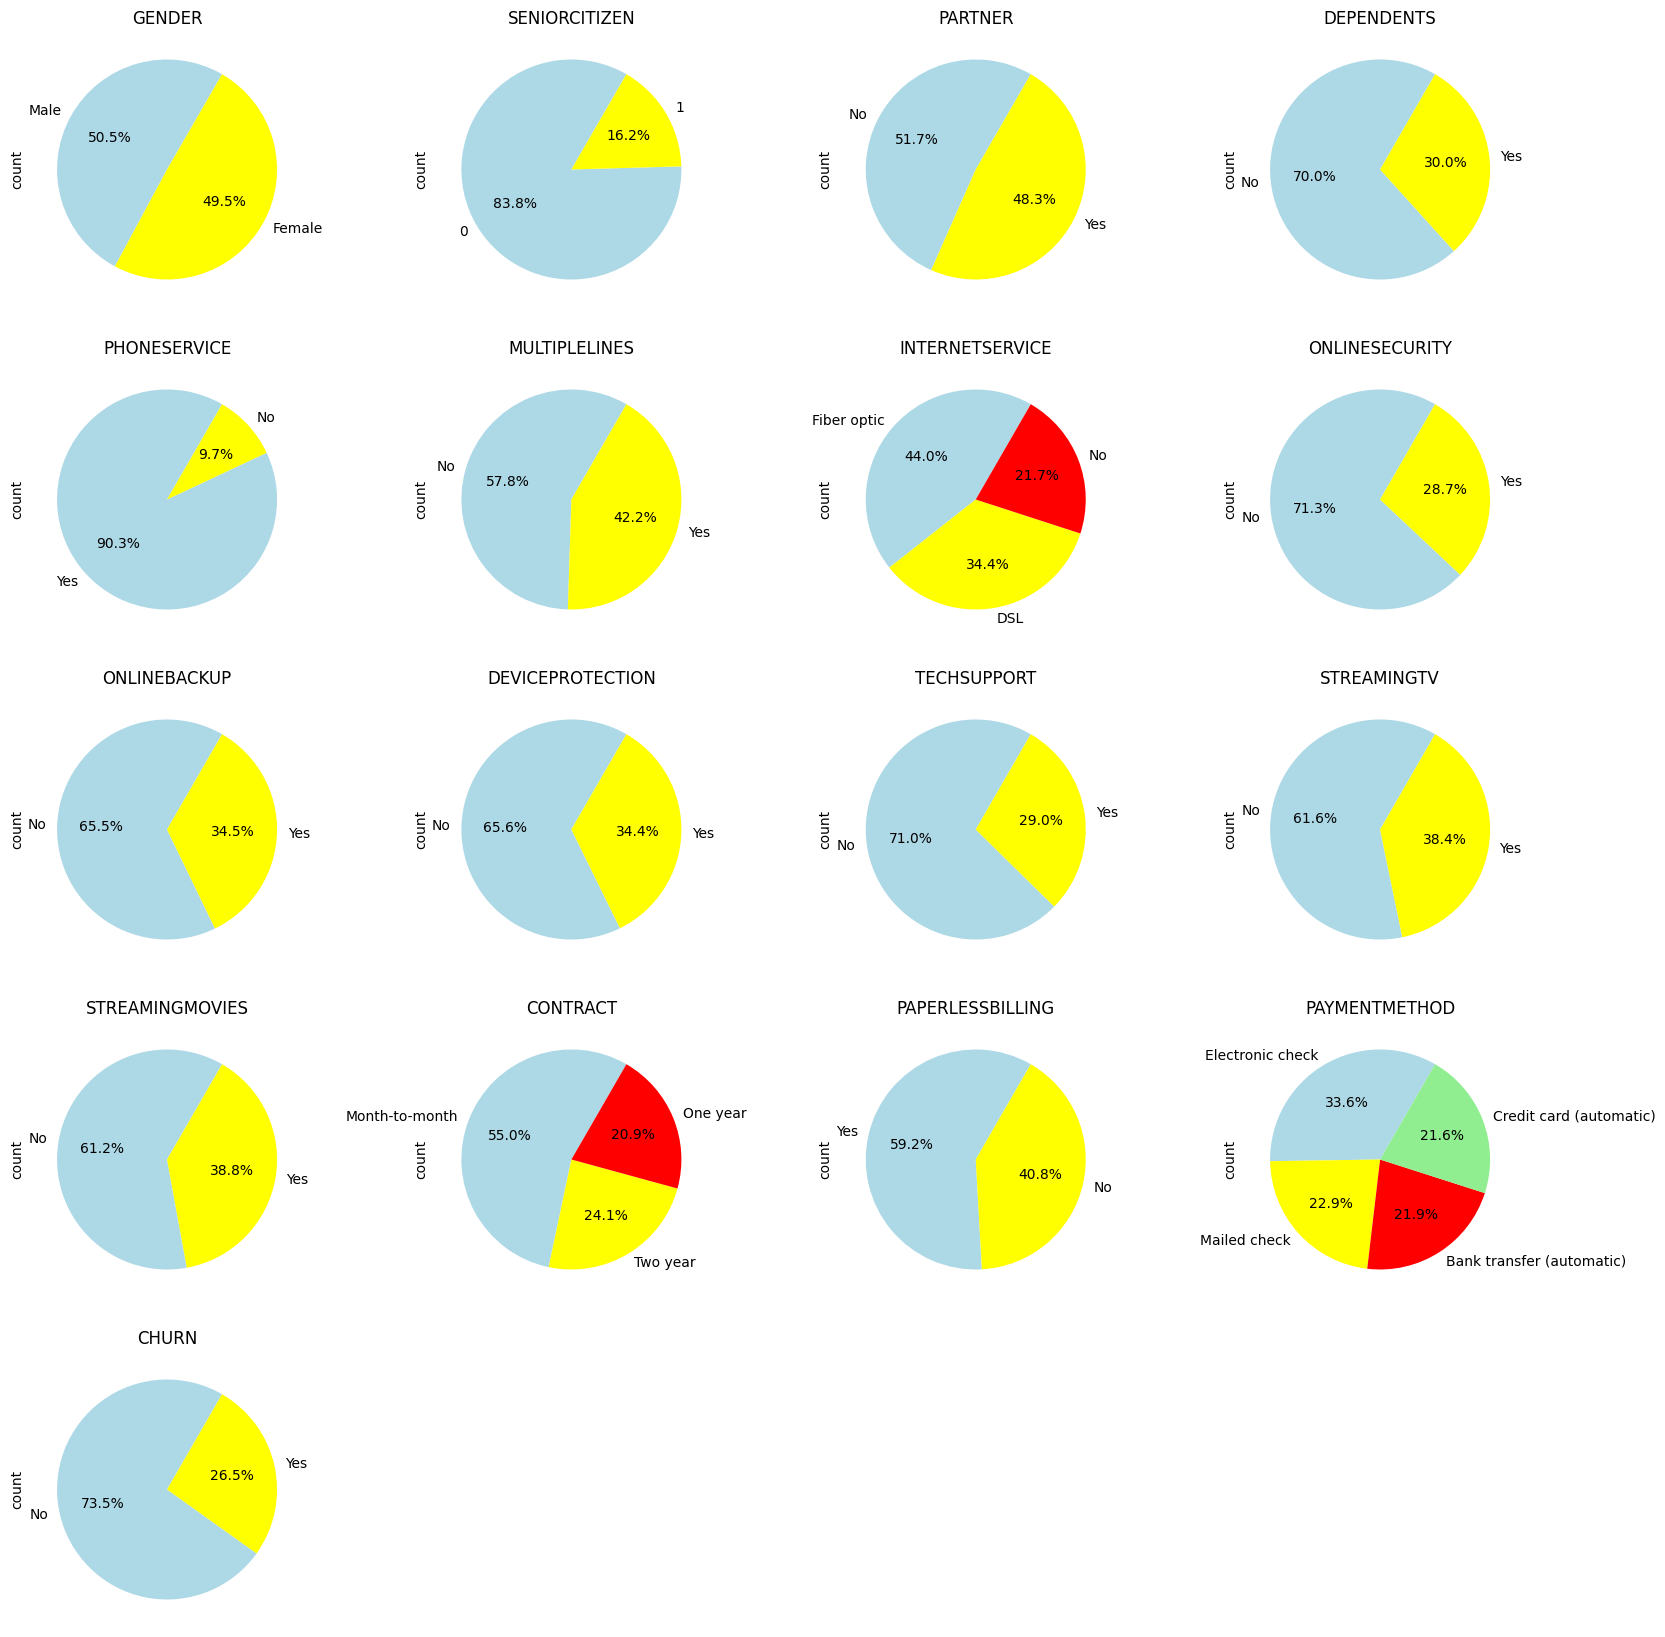

In [89]:
for i, var in enumerate(categorical):
    plt.subplot(round(len(categorical)/3), 4, i+1)
    data[var].value_counts().plot.pie(fontsize=10, figsize=(20,25), autopct="%2.1f%%", startangle=60, colors=['lightblue','yellow','red','lightgreen'])
    plt.title(f'{var.upper()}')

**Key observations**
1. `50.7%` of the customers are male.
2. `16.2%` of the customers are senior citizens.
3. `51.3%` of customers do not have partners.
4. `69.0%` of the customers have dependents.
5. `90.3%` of the customers have a phone service. 
6. Of the customers with a phone service, `57.8%` have Multiple Lines.
7. `78.6%` of the customers have Internet service. `44.6%` of them have Fiber and `34.0%` have a DSL connection.
8. The customers who have internet service, `71.1%` have Online Security, `65.7%` have Online Backup, `65.4%` have Device Protection, `70.4%` have Tech Support, `61.4%` have Movie Tv Streaming and `60.7%` have Movie Streaming.
9. `54.4%` of the customers have month-to-month contracts, while `20.9%` and `24.7%` have One Year and Two Year contracts respectively.
10. `59.4%` of customers use paperless billing.
11. The highest percentage of customer pay via Electronic check at `33.7%`, followed by Mailed Check, Bank transfer and Credit transfer at `22.4%`, `22.3%` and `21.6%` respectively.
12. The proportion of customers recorded to have churned is `26.5%`. The company has a retention of `73.5%`

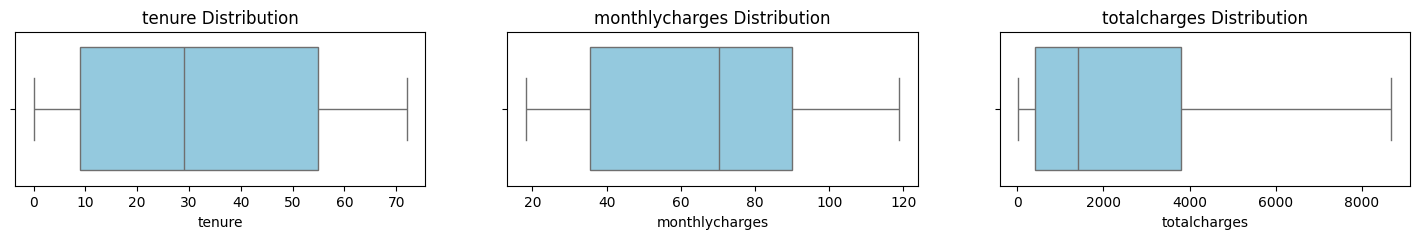

In [90]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(18,2)) #create subplot framework
for i, col in enumerate(numeric):
    plt.subplot(1,3,i+1)
    sns.boxplot(data[col], color='skyblue', orient='h')
    plt.title(f'{col} Distribution')

**Key Observations**
1. There are no outliers in the numeric columns
2. All numeric columns have some level of skewness and are not normally distributed.


#### Bivariate Analysis

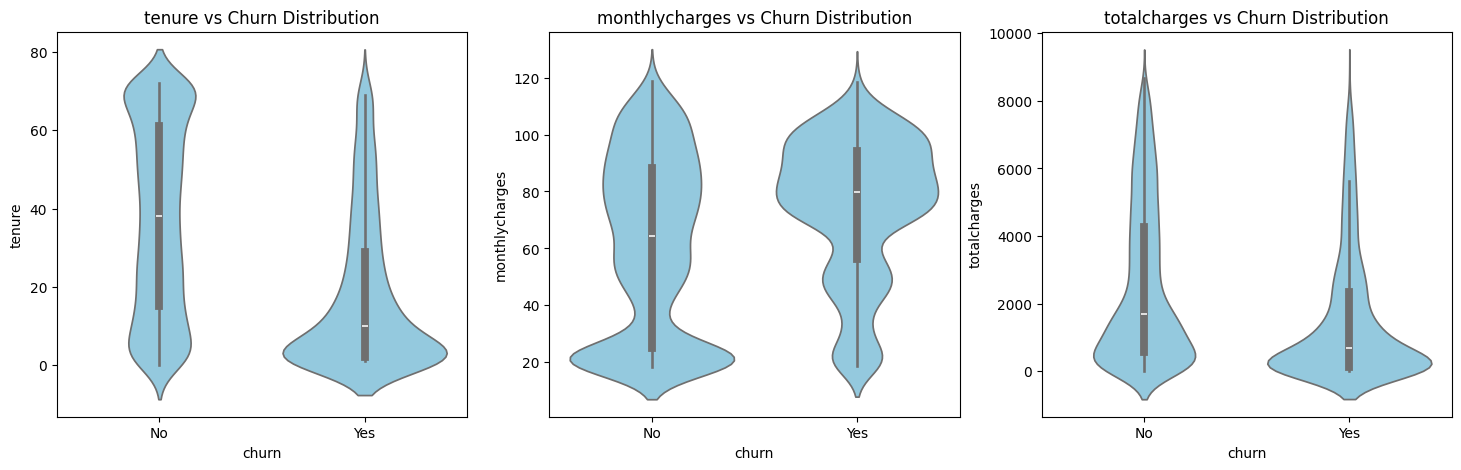

In [91]:
#checking distribution of numeric data across churned and unchurned customers
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
for i, col in enumerate(numeric):
    plt.subplot(1,3,i+1)
    sns.violinplot(data=data, x='churn', y=col, color='skyblue')
    plt.title(f'{col} vs Churn Distribution')

**Key Observations** 
1. The majority of the customers who churned were below `20` in tenure, with the median being much lower than that of remaining customers.
2. The median of churned customers in monthly charges is higher than the remaining customers and majority of those who churned are between `60` and `100`.
3. The proportion of customers who churned and those who remain have close Total charges' median values, although those who churned have it a little lower

In [92]:
len(categorical)

17

In [93]:
len(numeric)

3

In [94]:
len(data.columns)

20

In [95]:
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

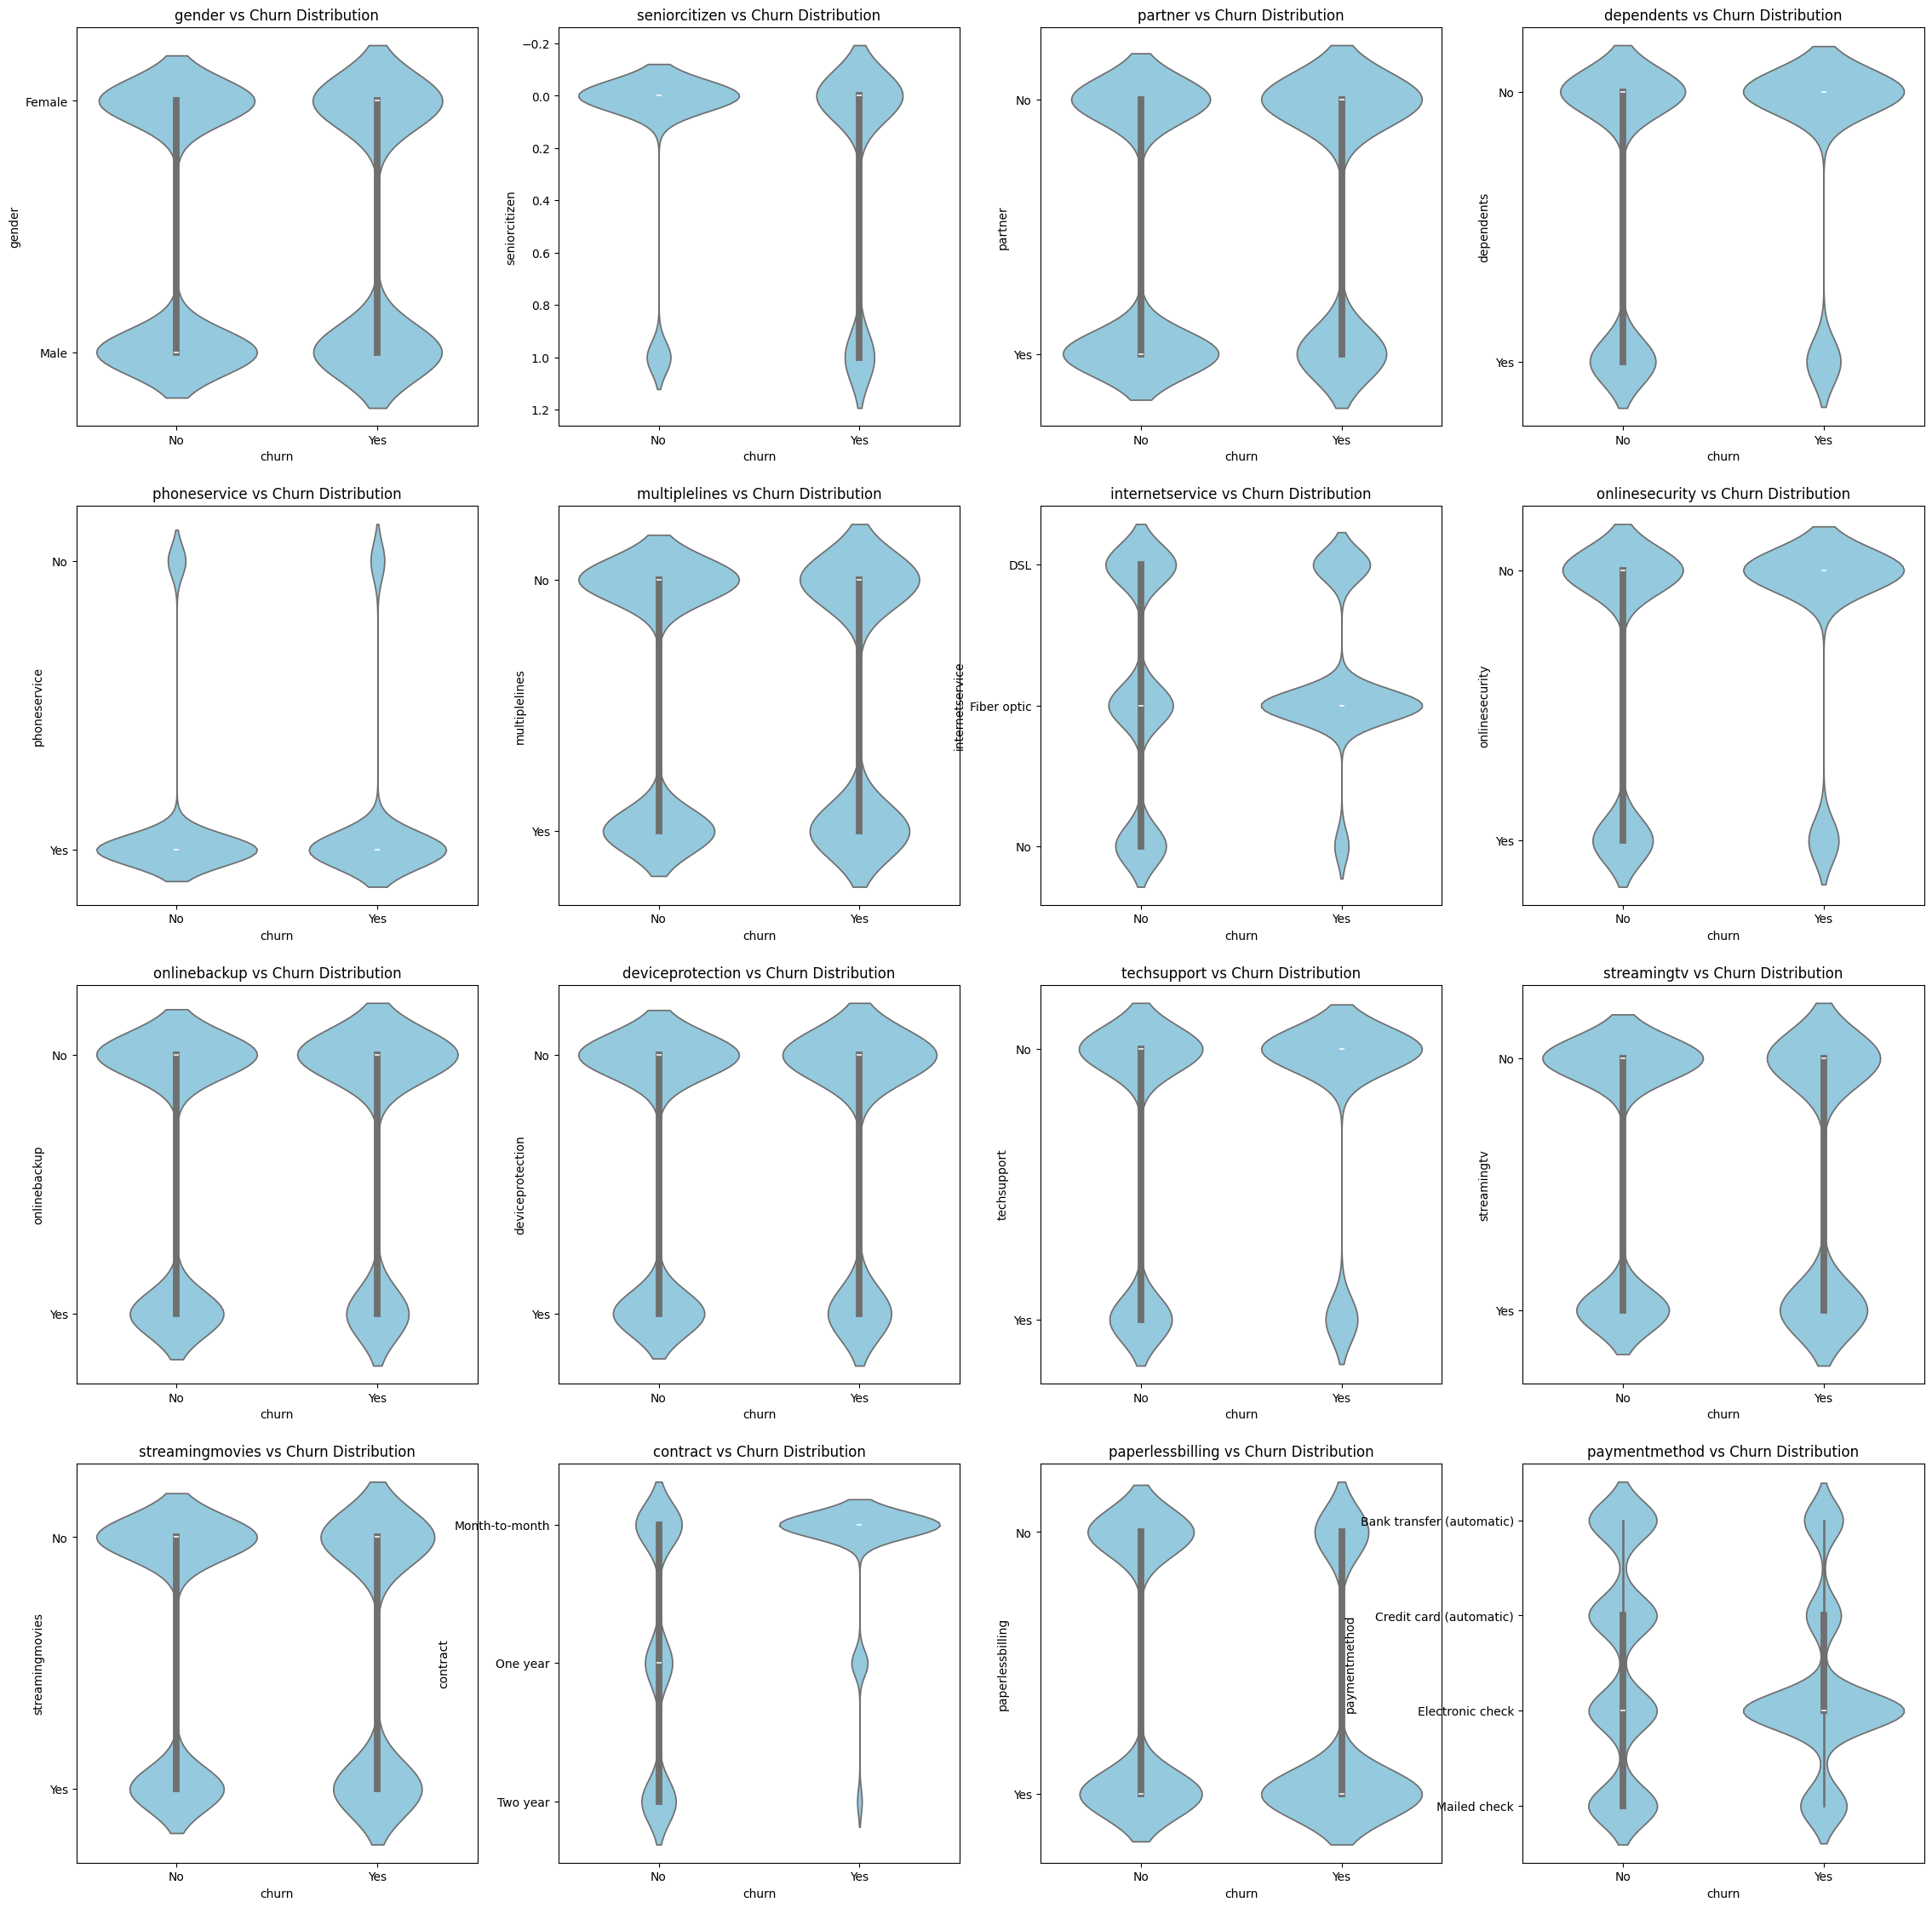

In [96]:
fig, axs = plt.subplots(nrows=round(len(categorical)/4),ncols=4,figsize=(28,28))
#Loop through cateogircal columns
for i, col in enumerate(categorical):
    if col != 'churn':
        plt.subplot(round(len(categorical)/4), 4, i+1)
        sns.violinplot(data=data, x='churn', y=col, color='skyblue')
        plt.title(f'{col} vs Churn Distribution')

**Observations:**
1. All columns have the median for those who churned and those who have remained in the same category **EXCEPT** for `Partner` and `Contract`. 
2. The median for `Partner` is in the `Yes` for those who remained and in `No` for those who churned.
3. The median for `Contract` is in `One Year` for those who remained and in `Month-to-month` for those who churned.

#### Multivariate Analysis

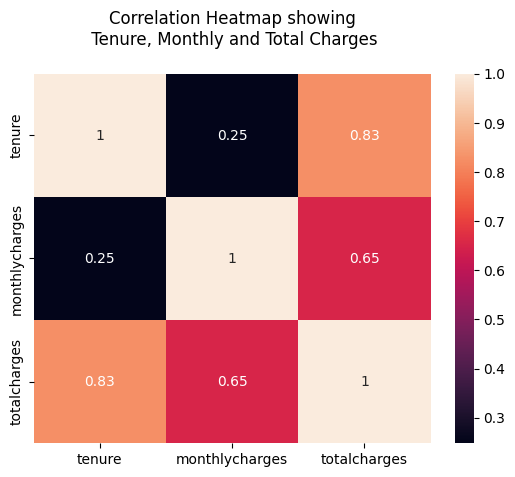

In [97]:
sns.heatmap(data=data[numeric].corr(), xticklabels=True, annot=True )
plt.title('Correlation Heatmap showing\n Tenure, Monthly and Total Charges\n')
plt.show()

**Observations**
1. Tenure is highly correlated with total charges
2. There is very little correlation between monthly charges and tenure
3. There is a moderate correlation between monthly and total charges.

<Axes: >

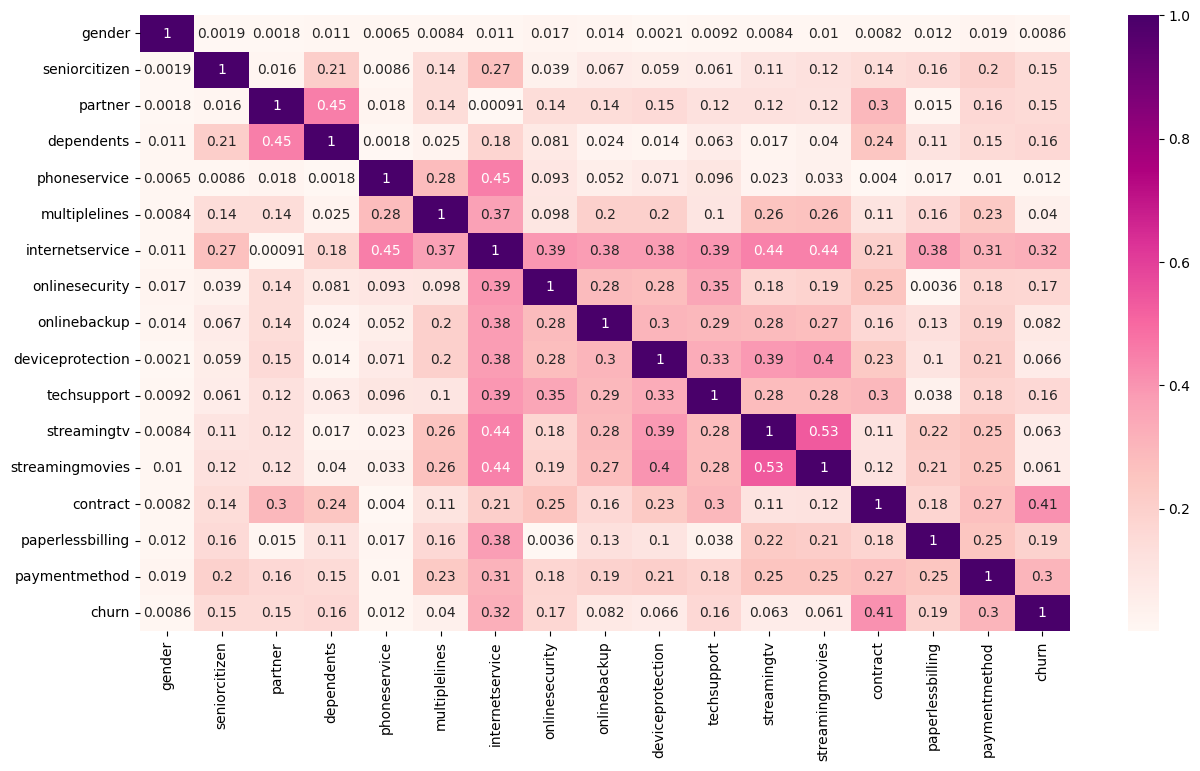

In [98]:
#visual of categorical column correlations
cramers = am.CramersV(data)
plt.figure(figsize=(15,8))
sns.heatmap(data = cramers.fit(), annot=True, cmap='RdPu')

**Key Observations**
1. The only columns with correlation above `0.5` are `streamingmovies` and `streamingtv` at `0.52`. 
2. Most of the columns have correlation below `0.2.`
3. The `internetservice` column has comparatively the highest correlation with other columns.
4. `Contract` has the highes correlation with `churn` at `0.46`
5. The three columns with highest correlation to churn are `contract`, `internetservice` and `paymentmethod` at `0.46`, `0.33`, and `0.29` respectively.

### **ANSWERING ANALYTICAL QUESTIONS**

In [99]:
data.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [100]:
#Fill missing values in totalcharges with corresponding values in monthlycharges
data['totalcharges'] = data['totalcharges'].fillna(data['monthlycharges'][data['totalcharges'].isna()])

In [101]:
data.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [102]:
len(data.columns)

20

##### **Question 1:** What are the top 3 features that have strong correlation to churn?

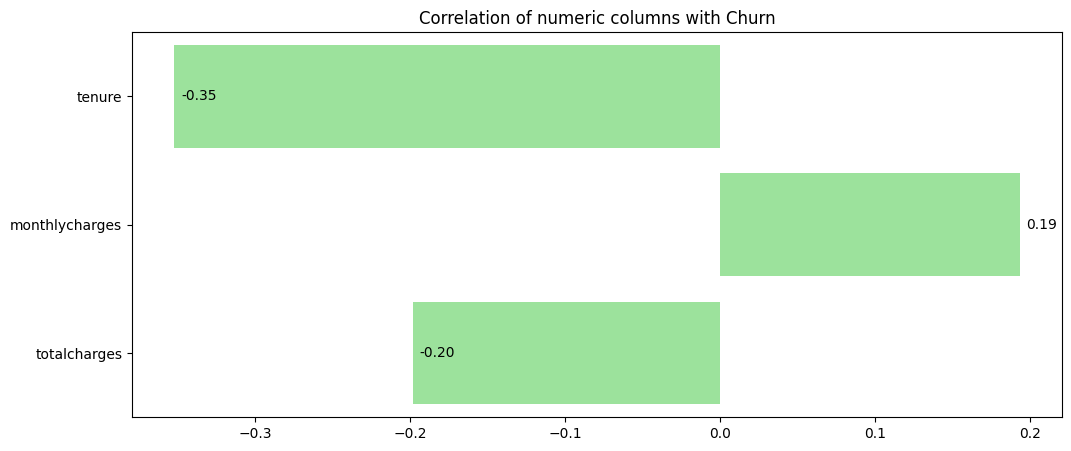

In [103]:
#pointbiserial correlation method for churn and numerical columns
df = {}
for col in numeric:
    corr, ind = stats.pointbiserialr(data['churn'].factorize()[0],data[col])
    df.setdefault(col, corr)
#plotting the biserial correlation
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df, orient='h', color='lightgreen')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.title('Correlation of numeric columns with Churn')
plt.show()

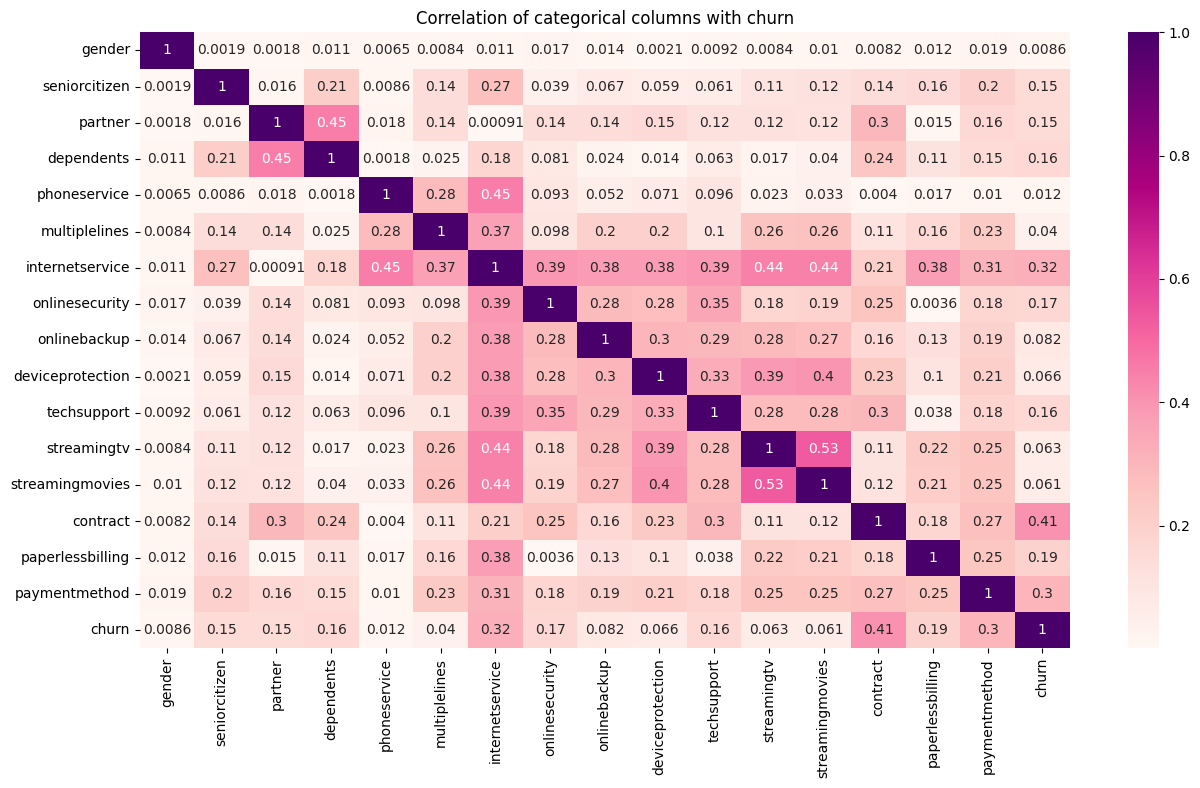

In [104]:
#visual of categorical column correlations
cramers = am.CramersV(data)
plt.figure(figsize=(15,8))
sns.heatmap(data = cramers.fit(), annot=True, cmap='RdPu')
plt.title('Correlation of categorical columns with churn')
plt.show()

* There is no column with a particularly strong correlation to churn as they are all below **0.5**.
* **`contract`**, **`tenure`** and **`internetservice`** are the top 3 columns that have the highest correlation with Churn at **`0.42`**, **`-0.35`** and **`0.33`** respectively.

##### **Question 2:** What was the financial impact of customer churn on Vodafone's revenue?

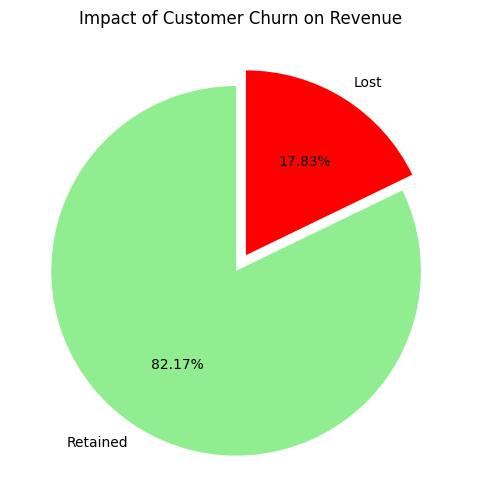

Customer Churn results in a loss of USD 2,862,926.90 in Revenue for the company


In [105]:
#Comparing revenue for churned and retained customers
retainedrevenue = (data
                   ['totalcharges']
                   .where(data['churn']== 'No')
                   .sum()
                   )
lostrevenue = (data
               ['totalcharges']
               .where(data['churn'] == 'Yes')
               .sum()
               )
churnimpact=[retainedrevenue, lostrevenue]
churnimpact
plt.figure(figsize=(6,6))
plt.pie(colors=['lightgreen','red'], startangle=90, x=churnimpact, explode=[0.05,0.05], autopct='%2.2f%%', labels=['Retained','Lost'])
plt.title(f'Impact of Customer Churn on Revenue')
plt.show()
print(f'Customer Churn results in a loss of USD {lostrevenue:,.2f} in Revenue for the company'.format())

In [106]:
len(data.columns)

20

##### **Question 3:** What are the prevalent contract types among customers exhibiting churn behavior?

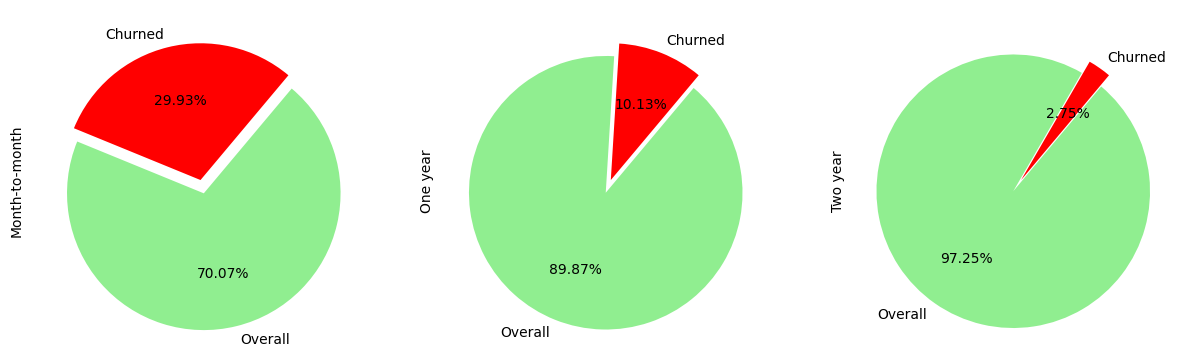

In [107]:
cntrct_ys = data['contract'].where(data['churn'] == 'Yes').value_counts()

# Use a different variable name for the new DataFrame
data_pie = pd.DataFrame({'Churned': cntrct_ys, 'Overall': data['contract'].value_counts()}).T

# Plotting
for i, col in enumerate(data_pie):
    plt.subplot(1, 3, i + 1)
    data_pie[col].plot(
        kind='pie',
        autopct='%2.2f%%',
        explode=[0, 0.1],
        startangle=50,
        figsize=(15, 10),
        colors=['red', 'lightgreen']
    )


* The Month to month contract is the most prevalent contract type with `30.14%` of the customers having churned.

##### **Question 4:** How does the distribution of tenure differ between churned and retained customers?

In [108]:
len(data.columns)

20

<Axes: ylabel='Density'>

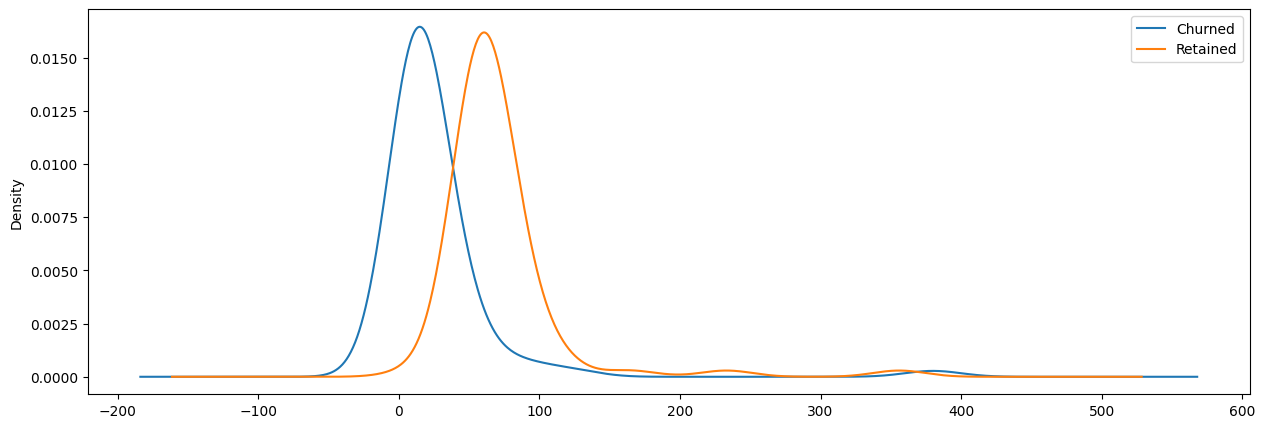

In [109]:
#checking distribution of tenure for retained and churned customers
churnedtenure = (data
                 ['tenure']
                 .where(data['churn'] == 'Yes')
                 .value_counts()
                 )
retainedtenure = (data
                 ['tenure']
                 .where(data['churn'] == 'No')
                 .value_counts()
                 )
data_tenure = pd.DataFrame({'Churned':churnedtenure,'Retained':retainedtenure})

data_tenure.plot(kind='kde', figsize=(15,5))

* The distribution of tenure in churned customers has a peak closer to `0` than that of retained customers. 
* This shows the churned customers had an average lower tenure than the retained customers.

##### **Question 5:** Is there a relationship between churn and specific internet service types (e.g., fiber vs. DSL)?

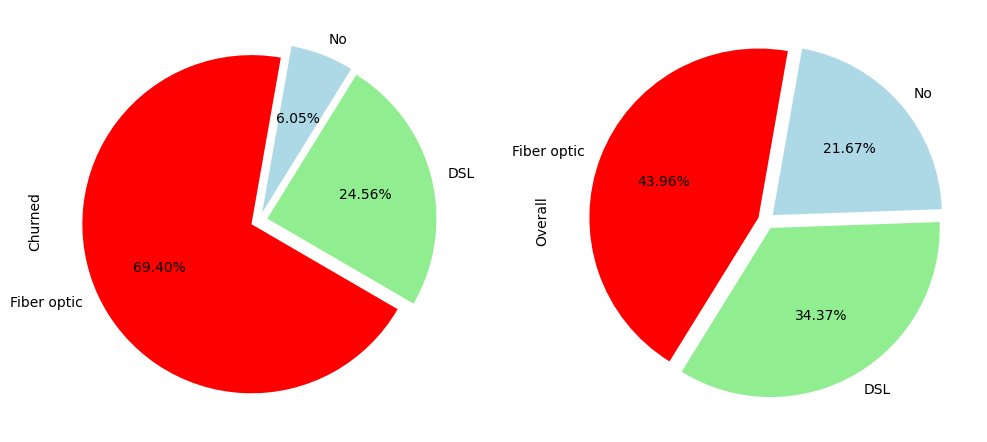

In [110]:
#checking change in ratio between churned and overall customers for internet service types.
intrnt_ys = data['internetservice'].where(data['churn'] =='Yes').value_counts()

data_ys = pd.DataFrame({'Churned':intrnt_ys, 'Overall':data['internetservice'].value_counts()})
for i,col in enumerate(data_ys):
    plt.subplot(1,2,i+1)
    data_ys[col].plot(
        kind='pie', 
        autopct = '%2.2f%%', 
        explode=[0.05,0.05,0.05],
        startangle=80, 
        figsize=(12,15), 
        colors=['red','lightgreen','lightblue']
        )

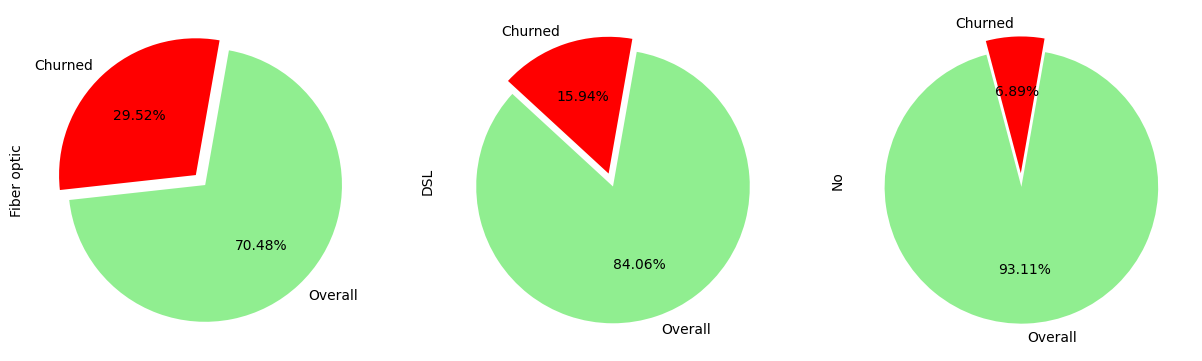

In [111]:
#checking the ratio of retained and lost customers for each internet service type
data_IS = pd.DataFrame({'Churned':intrnt_ys, 'Overall':data['internetservice'].value_counts()}).T
for i,col in enumerate(data_IS):
    plt.subplot(1,3,i+1)
    data_IS[col].plot(kind='pie', 
                      autopct = '%2.2f%%',
                      explode=[0.05,0.05], 
                      startangle=80, 
                      figsize=(15,15), 
                      colors=['red','lightgreen'])

* Fiber optic shows the highest relation with churn having a `29.74%` churn rate. 

##### **Question 6:** How do different payment methods (e.g., electronic check, credit card) relate with churn?

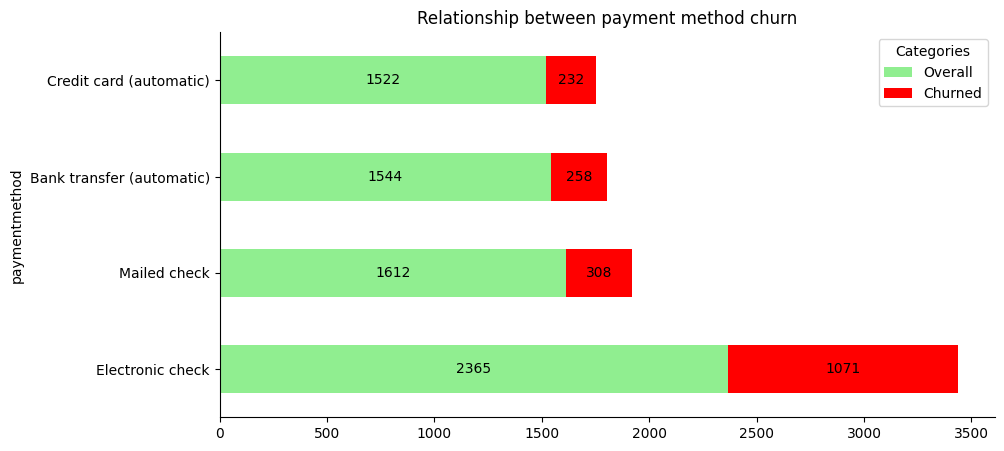

In [112]:
#Checking relationship between churned customers, contract types and payment methods.
pymnt_ys = data['paymentmethod'].where(data['churn']=='Yes').value_counts()
pymnt_ovrl = data['paymentmethod'].value_counts()
data_pymnt=pd.DataFrame({'Overall':pymnt_ovrl,'Churned':pymnt_ys})
data_pymnt

ax = data_pymnt.plot(kind='barh', stacked=True, color=['lightgreen', 'red'],figsize=(10,5))
for c in ax.containers:
    ax.bar_label(c, label_type='center')
        
ax.legend(title='Categories', loc='upper right')
sns.despine(top=True, right=True)
plt.title('Relationship between payment method churn')
plt.show()

###  **Hypothesis Testing**

In [113]:
# Creating contingency table
contingency_table = pd.crosstab(data['tenure'], data['churn'])
 
# Chi-Square Test
observed = contingency_table.values
chi2, p, dof, expected = stats.chi2_contingency(observed)
 
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
 
# Interpretation
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
if p < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between tenure and churn.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant relationship between tenure and churn.")


Chi-Square Statistic: 1065.3308567510544
Degrees of Freedom: 72
P-value: 1.2807811055496877e-176

Significance Level (alpha): 0.05
Reject Null Hypothesis: There is a significant relationship between tenure and churn.


## **3. DATA PREPROCESSING**

In [114]:
data.dtypes

gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [115]:
data[categorical] = data[categorical].astype('object')
data.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [116]:
#Splitting data
#Use Stratified Test Split
X = data.drop(columns= ['churn'])
y = data['churn']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [117]:
# Encoding target variable
encoder = LabelEncoder()

#fitting y_train and y_eval
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [118]:
#Checking Dtypes
X.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [119]:
#List of numeric Columns
numerical = X.select_dtypes('number').columns
categoric = X.select_dtypes('object').columns

print(categoric)
print(numeric)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')
['tenure', 'monthlycharges', 'totalcharges']


##### **Building Pipeline**

In [120]:
# Set up the transformers
# For the numeric variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), # handlie missing values
                                      ("scaler", StandardScaler()) # scale numerics
                                     ]
                              )
# For the categorical variables
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=False)),
                                       ("imputer", SimpleImputer(strategy="most_frequent"))
                                      ]
                               )
# Set up the final preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[("numeric", numeric_transformer, numerical),
                                                     ("categorical", categorical_transformer, categoric)
                                                    ]
                                      )
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])

In [121]:
#Checking if data is balanced
y_train.value_counts()

churn
No     4139
Yes    1495
Name: count, dtype: int64

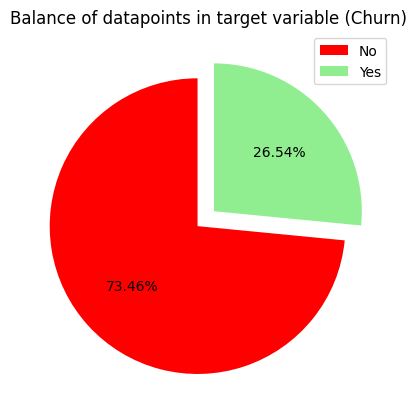

In [122]:
#checking data balance
plt.pie(x=y_train.value_counts(),autopct='%2.2f%%', colors=['red','lightgreen'], startangle=90, explode=[0.1,0.05])
plt.title('Balance of datapoints in target variable (Churn)')
plt.legend(labels=['No','Yes'])
plt.show()

**Observation**

* The Data is **`SEVERELY imbalanced`** at a ratio of `73.49%` to `26.51%` for `No` and `Yes` respectively.

Reference for how to deal with imbalanced data
https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38

**Action**

We will train on unbalanced first, and then compare performance with a balanced dataset.

## **4. MODELING AND EVALUATION**

* K-Nearest Neighbour, Decision Trees, Random forest, SVMs, Naïve Bayes, Logistic regression

https://www.justintodata.com/imbalanced-data-machine-learning-classification/

In [123]:
#Building Model List
models = [('RandomForest', RandomForestClassifier(random_state=42)), 
          ('LogisticRegression',LogisticRegression(random_state=42)),
          ('AdaBoost',AdaBoostClassifier(random_state=42, n_estimators=67)),
          ('XGB', XGBClassifier(random_state = 42, verbose = False, n_jobs = -1)),
          ('DecisionTree', DecisionTreeClassifier(random_state= 42)),
          ('KNN',KNeighborsClassifier(n_neighbors=7))
          ]

##### **Training and Evaluating Unbalanced Data**

In [124]:
# Dictionary to store trained pipelines
all_pipelines = {}

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

# Dictionary to store confusion matrices
confusion_matrices = {}

# Loop over models
for model_name, classifier in models:  # models should be a list of (name, classifier) tuples
    # Create a pipeline for each model
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Train the pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Add the trained pipeline to the dictionary
    all_pipelines[model_name] = final_pipeline
    
    # Make predictions
    y_pred = final_pipeline.predict(X_eval)
    
    # Calculate evaluation metrics
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract weighted average precision, recall, and F1 score
    model = model_name
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    metrics_df.loc[len(metrics_df)] = [model, precision, recall, f1_score]
    
    # Calculate and store the confusion matrix
    model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
    confusion_matrices[model] = model_conf_mat

# Set the index of metrics_df to the model name
#metrics_df = metrics_df.set_index('model')

# Sort the metrics DataFrame by F1 score in descending order
metrics_df = metrics_df.sort_values('f1_score', ascending=False)

# Display the sorted metrics
print(metrics_df)


                model  precision    recall  f1_score
1  LogisticRegression   0.799432  0.806955  0.801687
2            AdaBoost   0.786039  0.795600  0.788630
0        RandomForest   0.774183  0.787083  0.776406
3                 XGB   0.771655  0.778566  0.774410
5                 KNN   0.767413  0.765791  0.766576
4        DecisionTree   0.732160  0.730305  0.731209


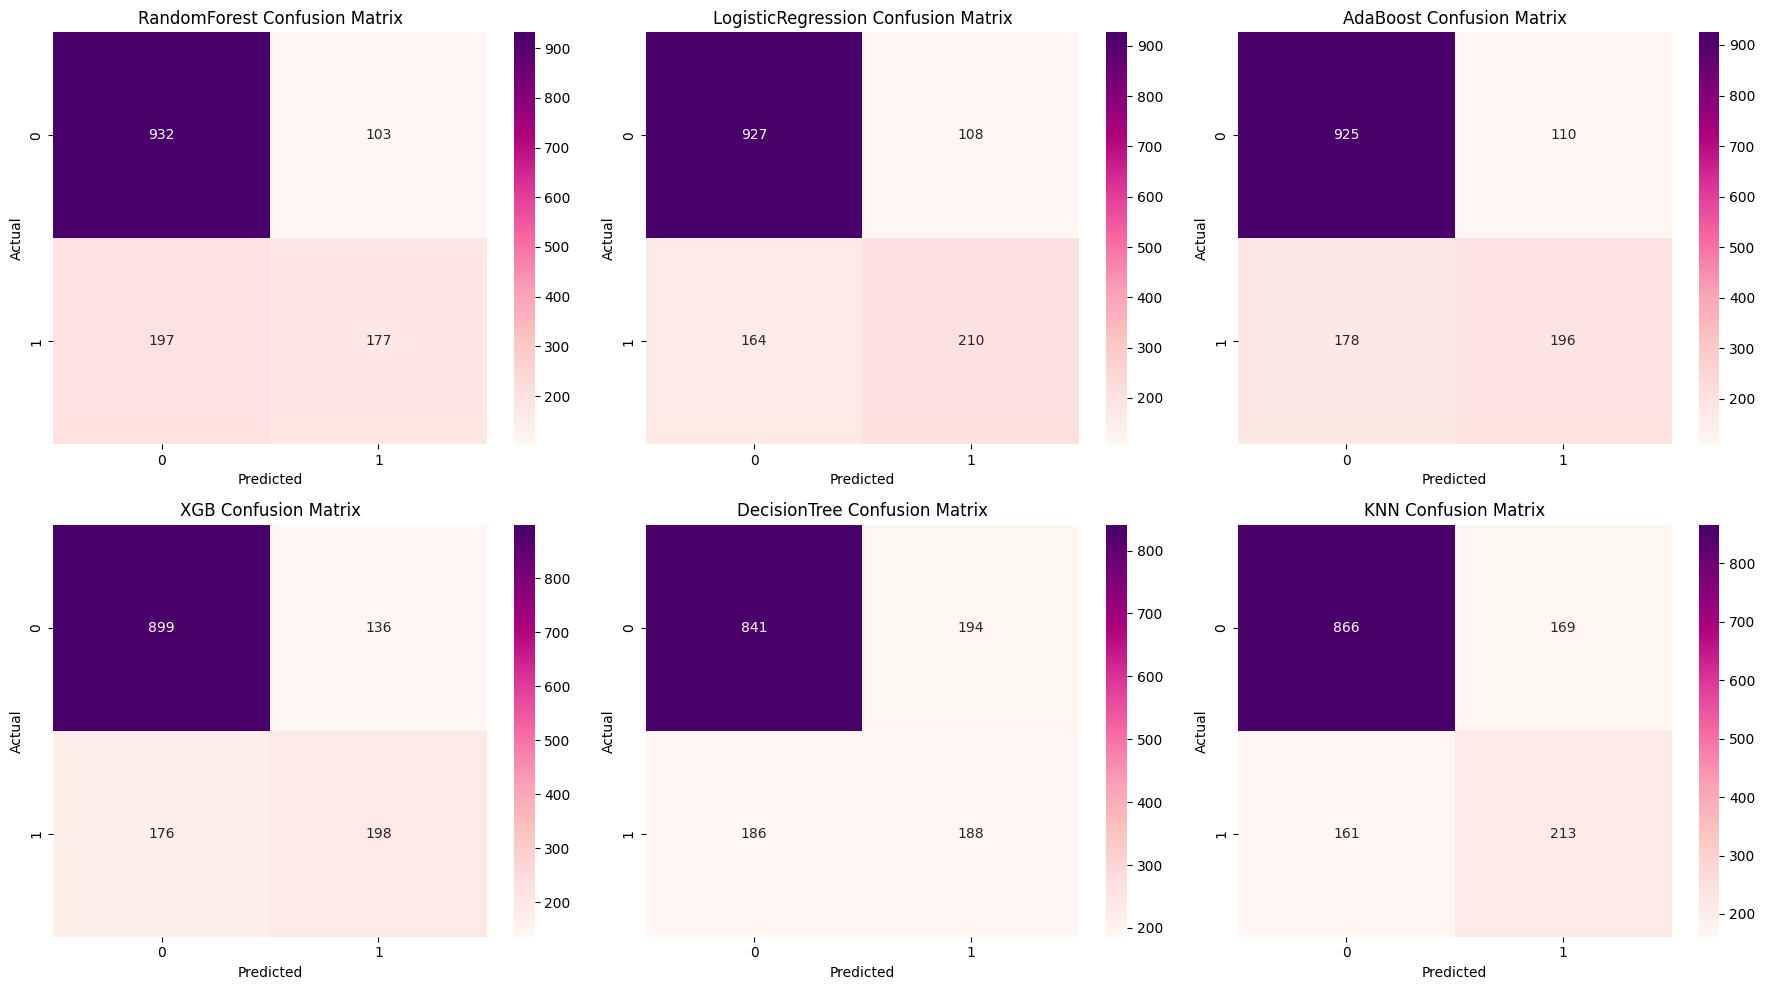

In [125]:
# Create subplots for confusion matrices
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Loop through trained models to plot confusion matrices
for i, (model, matrix) in enumerate(confusion_matrices.items()):
    ax = axs[i // 3, i % 3]  # Determine subplot position
    sns.heatmap(matrix, annot=True, cmap='RdPu', fmt='d', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

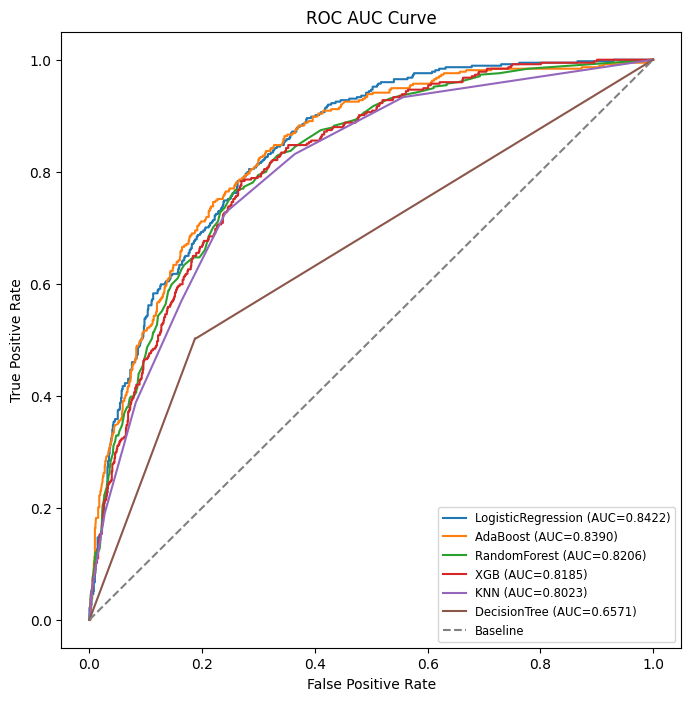

In [126]:
# Dictionary to store ROC AUC data and AUC scores
roc_auc_df = {}
auc_scores = {}

# Calculate ROC curves and AUC scores
for model, pipeline in all_pipelines.items():
    # Prediction probabilities
    y_score = pipeline.predict_proba(X_eval)[:, 1]

    # Calculate FPR, TPR, thresholds, and AUC score
    fpr, tpr, threshold = roc_curve(y_eval_encoded, y_score)
    auc_score = auc(fpr, tpr)

    # Store ROC data and AUC score
    roc_auc_df[model] = pd.DataFrame({'FalsePositiveRate': fpr, 'TruePositiveRate': tpr, 'Threshold': threshold})
    auc_scores[model] = auc_score

# Sort models by AUC score in descending order
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

# Plot ROC AUC curves
fig, ax = plt.subplots(figsize=(8, 8))

for model, auc_score in sorted_auc:
    roc_data = roc_auc_df[model]
    ax.plot(roc_data['FalsePositiveRate'], roc_data['TruePositiveRate'], label=f'{model} (AUC={auc_score:.4f})')

# Add baseline
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Baseline')

# Add labels and title
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title('ROC AUC Curve')

# Add legend in sorted order
plt.legend(loc='lower right', fontsize='small')

# Display the plot
plt.show()

**Observation**

When using unbalanced data we can observe the following:

1. **`Logistic Regression` has the best overall performance with an `AUC score` of `85.20%` and `f1_score` of `79.78%`.**

2. **`AdaBoost` and `RandomForest` are the 2nd and 3rd best performers with `AUC scores` of `85.17%` and `83.94%`  and `f1_scores` of **`79.50%`** and **`78.28%`** respectively.**

#### **Training on Balanced (SMOTE oversampling) Dataset**

In [135]:
# Create a dictionary to host all the trained models
all_balanced_pipelines = {}

# Create a dataframe of the evaluation metrics
balanced_metrics_df = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

# Create a dataframe for confusion matrices
balanced_confusion_df = pd.DataFrame(columns=['model', 'matrix'])

# Loop over models in model list
for model_name, classifier in models:
    # Create final pipeline for training
    balanced_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)
    
    # Add to dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline
    
    # Perform prediction
    y_pred = balanced_pipeline.predict(X_eval)
    
    # Calculate evaluation metrics
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Define the columns to add to the table
    model = model_name
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']
    
    # Append evaluation metrics to dataframe
    balanced_metrics_df.loc[len(balanced_metrics_df)] = [model, precision, recall, f1_score]
    
    # Define the Confusion Matrix
    balanced_model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
    
    # Append to confusion dataframe
    balanced_confusion_df.loc[len(balanced_confusion_df)] = [model_name, pd.DataFrame(balanced_model_conf_mat)]

# Set the index of balanced_metrics_df to 'model'
#balanced_metrics_df = balanced_metrics_df.set_index('model')

# Set the index of balanced_confusion_df to 'model'
#balanced_confusion_df = balanced_confusion_df.set_index('model')

# Sort balanced_metrics_df by f1_score
balanced_metrics_df = balanced_metrics_df.sort_values('f1_score', ascending=False)

# Display the sorted dataframe
print(balanced_metrics_df)

                model  precision    recall  f1_score
0        RandomForest   0.779769  0.780696  0.780222
2            AdaBoost   0.797397  0.762952  0.772947
3                 XGB   0.772147  0.770759  0.771433
1  LogisticRegression   0.799538  0.736693  0.750932
4        DecisionTree   0.741771  0.723208  0.730536
5                 KNN   0.768629  0.697658  0.714462


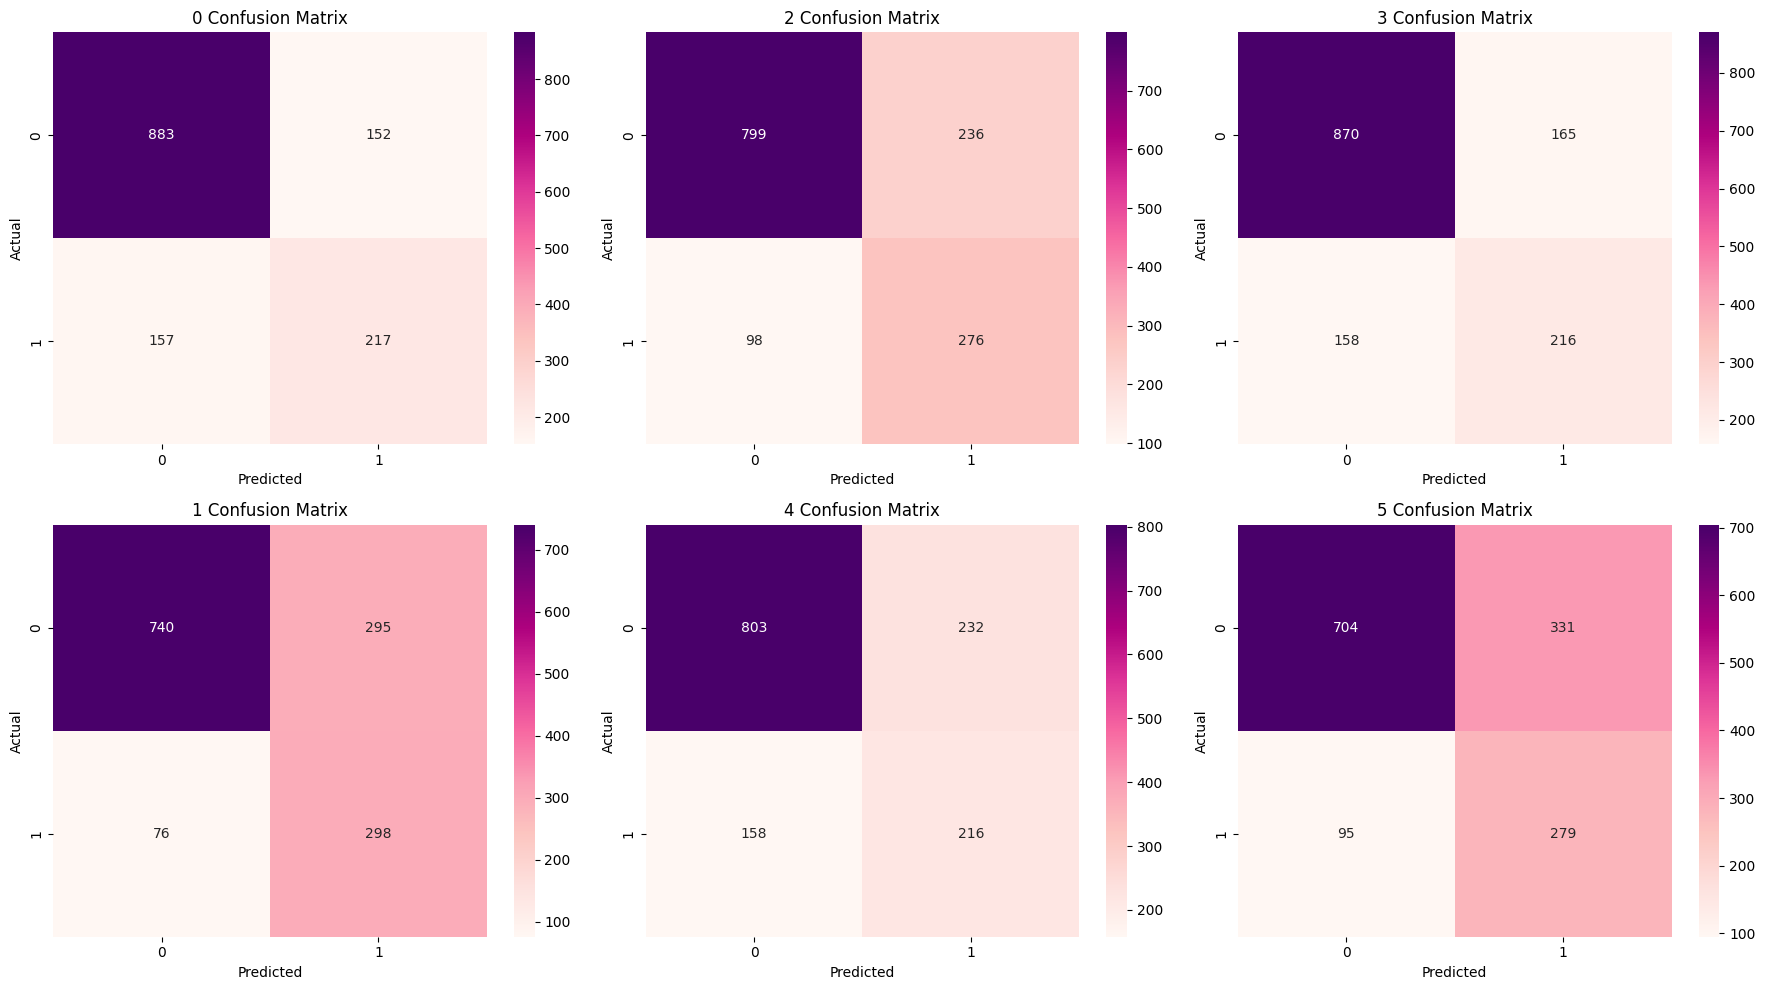

In [136]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Loop through trained models to plot confusion matrices
for i, model in enumerate(balanced_metrics_df.index):
    ax = axs[i // 3, i % 3]  # Determine the position of the subplot
    matrix = balanced_confusion_df.loc[model, 'matrix']  # Access the matrix
    
    # If 'matrix' is stored as a DataFrame, convert it to numpy for plotting
    if isinstance(matrix, pd.DataFrame):
        matrix = matrix.values
    
    # Plot the confusion matrix
    sns.heatmap(matrix, annot=True, cmap='RdPu', fmt='d', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


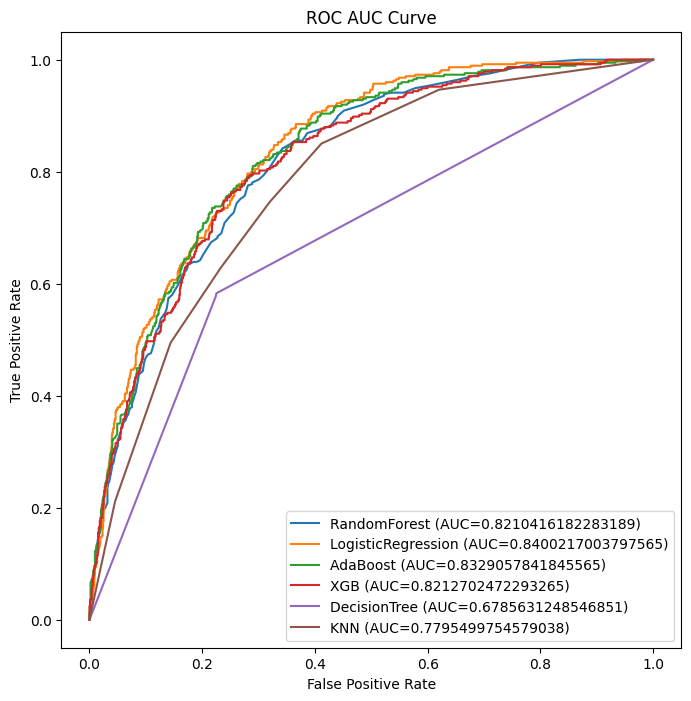

In [137]:
#Create a dctionary for the ROC AUC scores
balanced_roc_auc_df = {}

fig, ax = plt.subplots(figsize=(8,8))

for model,pipeline in all_balanced_pipelines.items():
    #calculate prediction probabilities for the ROC AUC curve
    y_score = pipeline.predict_proba(X_eval)[:,1]

    #calculate ROC AUC
    fpr, tpr, threshold = roc_curve(y_eval_encoded,y_score)
    auc_score = auc(fpr,tpr)

    #append to balanced_roc_auc dictionary
    balanced_roc_auc_dict = pd.DataFrame({'FalsePositiveRate':fpr,'TruePositiveRate':tpr,'Threshold':threshold})
    
    #append to dataframe
    balanced_roc_auc_df[model] = balanced_roc_auc_dict
    
    ax.plot(fpr,tpr, label = f'{model} (AUC={auc_score})')
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

plt.legend(loc = 'lower right')
plt.title('ROC AUC Curve')
plt.show()    

**Observation**

When using data balanced by Oversampling (SMOTE) we can observe the following;

1. **When using unbalanced data, the model that had the best F1 Score also had the best AUC Score, However, When using SMOTE Oversampled Dataset, this is not the case.**

1. **`ADABoost` has the best `AUC score` of `85.20%` followed by `LogisticRegression` and `RandomForest` at `85.20%` and `83.78%` respectively.**

2. **`RandomForest` has the best `F1_score` of `78.81%` followed by `Adaboost` and `XGBoost` at `78.0%` and `76.9%` respectively.**

3. **Looking at the Confusion Matrices, the models perform better on predicting true positives when the data is balanced as opposed to when it's imbalanced. The best performers in this regard are `LogisticRegression`, followed by `KNN` and `AdaBoost`**

#### **Training on Balanced (Weighting) Dataset**

In [138]:
#Building weighted Model List
weighted_models = [('RandomForest', RandomForestClassifier(random_state=42, class_weight="balanced")), 
          ('LogisticRegression',LogisticRegression(random_state=42, class_weight="balanced")),
         #('AdaBoost',AdaBoostClassifier(random_state=42, n_estimators=67 )),
         #('XGB', XGBClassifier(random_state = 42, verbose = False, n_jobs = -1)),
          ('DecisionTree', DecisionTreeClassifier(random_state= 42, class_weight="balanced"))
         #('KNN',KNeighborsClassifier(n_neighbors=7,))
]

#Boosted Models work in a way that does not need weighting
#checking if performance of balanced models is better than unweighted models

In [139]:
#create a dictionary to host all the trained models
all_weighted_pipelines = {}

#Create a dataframe of the evaluation metrics
weighted_metrics_df = pd.DataFrame(columns=['model','precision','recall','f1_score'])

#Create a dataframe for confusion matrices
weighted_confusion_df = pd.DataFrame(columns=['model','matrix'])

#loop over models in model list
for model_name,classifier in weighted_models:
    
    #create final pipeline for training
    weighted_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])
    
    #fitting data to pipeline
    weighted_pipeline.fit(X_train,y_train_encoded)
    
    #adding to dictionary
    all_weighted_pipelines[model_name] = weighted_pipeline
    
    #perform prediction
    y_pred = weighted_pipeline.predict(X_eval)
    
    #calculate evaluation metrics ()
    weighted_metrics = classification_report(y_eval_encoded,y_pred, output_dict=True)
    
    #define the columns to add to the table
    model = model_name
    precision = weighted_metrics['weighted avg']['precision']
    recall = weighted_metrics['weighted avg']['recall']
    f1_score = weighted_metrics['weighted avg']['f1-score']
    
    #append evaluation metrics to dataframe
    weighted_metrics_df.loc[len(weighted_metrics_df)] = [model,precision,recall,f1_score]
    
    #create an empty dictionary for the confusion matrices
    weighted_pipeline_conf_dict = {}
    
    # Define the Confusion Matrix
    weighted_model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
    
    #append confusion matrix to dictionary
    weighted_pipeline_conf_dict[model_name] = pd.DataFrame(weighted_model_conf_mat)
    
    #append to confusion dataframe
    weighted_confusion_df.loc[len(weighted_confusion_df)] = [model_name,pd.DataFrame(weighted_model_conf_mat)]
     
#balanced_metrics_df
#set index   
weighted_confusion_df = weighted_confusion_df.set_index('model')

weighted_metrics_df.sort_values('f1_score', ascending=False)

,model,precision,recall,f1_score
0,RandomForest,0.768492,0.782115,0.771046
1,LogisticRegression,0.798226,0.740241,0.753933
2,DecisionTree,0.732274,0.733854,0.733045


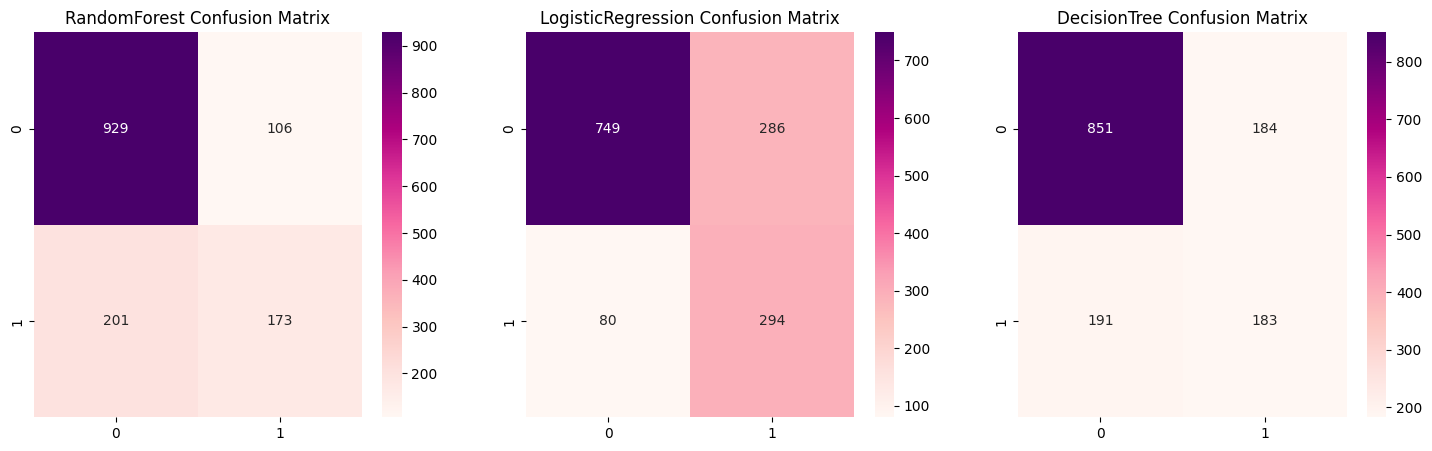

In [140]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
#Loop through trained models to plot confusion matrix
for i, model in enumerate(weighted_metrics_df['model']):
    plt.subplot(1,3,i+1)
    sns.heatmap(weighted_confusion_df['matrix'][model], annot=True, cmap='RdPu', fmt='2.0f')
    plt.title(f'{model} Confusion Matrix')
plt.show()

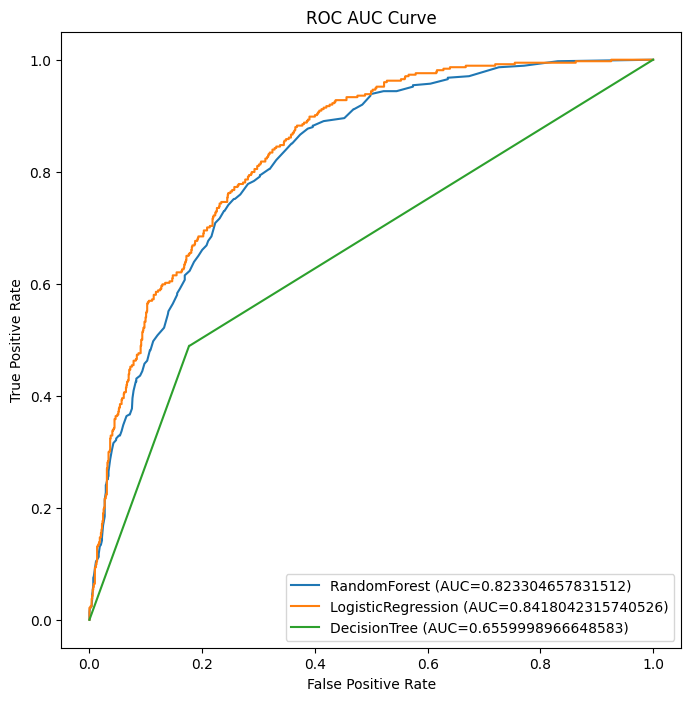

In [141]:
#Create a dctionary for the ROC AUC scores
weighted_roc_auc_df = {}

fig, ax = plt.subplots(figsize=(8,8))

for model,pipeline in all_weighted_pipelines.items():
    #calculate prediction probabilities for the ROC AUC curve
    y_score = pipeline.predict_proba(X_eval)[:,1]

    #calculate ROC AUC
    fpr, tpr, threshold = roc_curve(y_eval_encoded,y_score)
    auc_score = auc(fpr,tpr)

    #append to balanced_roc_auc dictionary
    weighted_roc_auc_dict = pd.DataFrame({'FalsePositiveRate':fpr,'TruePositiveRate':tpr,'Threshold':threshold})
    
    #append to dataframe
    weighted_roc_auc_df[model] = weighted_roc_auc_dict
    
    ax.plot(fpr,tpr, label = f'{model} (AUC={auc_score})')
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

plt.legend(loc = 'lower right')
plt.title('ROC AUC Curve')
plt.show()

**Observation**

1. Not all models have a class_weight option.
2. `Random Forest` has the best `f1_score` at `78.86%`.
3. `LogisticRegression` has the best `AUC Score` at `85.11%`.
4. `RandomForest` gains a boost in performance when trained on weighted data as compared to oversampled data in `f1_score` and `AUC` but it loses accuracy of the `True Positive` predicted values as shown in the confusion matrix.

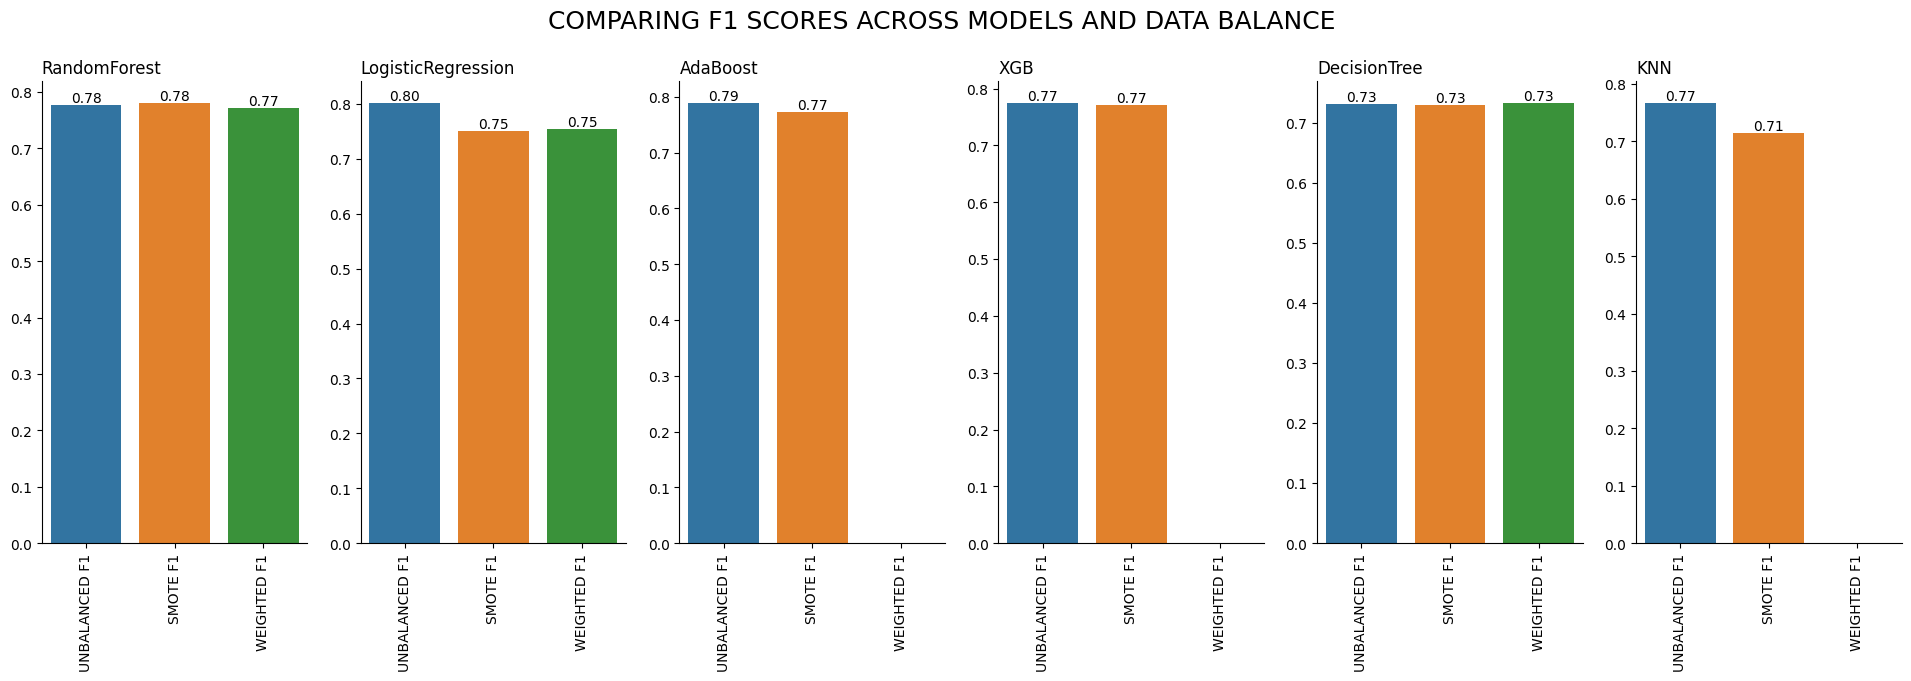

In [142]:
#Comparing the F1 scores of models on imbalanced and balanced data
Unbalanced_f1 = {}
Smote_f1 = {}
weighted_f1 = {}

# Create Dictionary for All Models
f1_df = {}

for model,classifier in models:
    Unbalanced_f1[model] = metrics_df['f1_score'].where(metrics_df['model'] == model).dropna() #selects the f1 score for unbalanced dataset
    Smote_f1[model] = balanced_metrics_df['f1_score'].where(balanced_metrics_df['model'] == model).dropna() #select f1_score for SMOTE balanced dataset
    weighted_f1[model] = weighted_metrics_df['f1_score'].where(weighted_metrics_df['model'] == model).dropna() #select f1_score for weighted dataset
    
    #append to Dictionary
    f1_df[model] = pd.DataFrame({'UNBALANCED F1':Unbalanced_f1[model],'SMOTE F1':Smote_f1[model],'WEIGHTED F1':weighted_f1[model]})
    
#Plotting F1 score performance of models based on imbalanced and balanced data
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(24, 6))

#Loop through trained models to f1_scores of models
for i, model in enumerate(f1_df):

    plt.subplot(1,6,i+1)
    axs = sns.barplot(f1_df[model], orient='v')
    sns.despine(top=True,right=True)
    for c in axs.containers:
        axs.bar_label(c, label_type='edge', fmt='%.2f')
    plt.title(f'{model}', loc='left')
    plt.xticks(rotation=90)
    
plt.suptitle(f'COMPARING F1 SCORES ACROSS MODELS AND DATA BALANCE',y=1.0, fontsize=18)    
plt.show()

* The best performing model based on f1 score is The Logistic Regression run on unbalanced data

**Action**

Based on the observed performance of `f1_score`,`AUC Score` and `True positive prediction` , we will proceed to test, tune and export `SMOTE - LogisticRegression`, `SMOTE - AdaBoost` and `WEIGHTED-RandomForest` models 

#### Choosing best performing models

In [143]:
#Best Performing models
logreg = all_balanced_pipelines['LogisticRegression']
adaboost = all_balanced_pipelines['AdaBoost']
randomforest = all_weighted_pipelines['RandomForest']
#appending chosen models to dictonary
chosen_models = {'logreg':logreg,'adaboost':adaboost,'randomforest':randomforest}

In [144]:
#Optimal Threshold for the models
#balanced_roc_auc_df['LogisticRegression'].nlargest(50, columns='TruePositiveRate') #threshold = 0.126706
#balanced_roc_auc_df['AdaBoost'].nlargest(60, columns='TruePositiveRate') #threshold = 0.488596
#weighted_roc_auc_df['RandomForest'].nlargest(60, columns='TruePositiveRate') #threshold = 0.070000

#create optimal threshold dataframe
threshold_df = pd.DataFrame({'Model':['logreg','adaboost','randomforest'],'Threshold':[0.126706,0.488596,0.070000]})

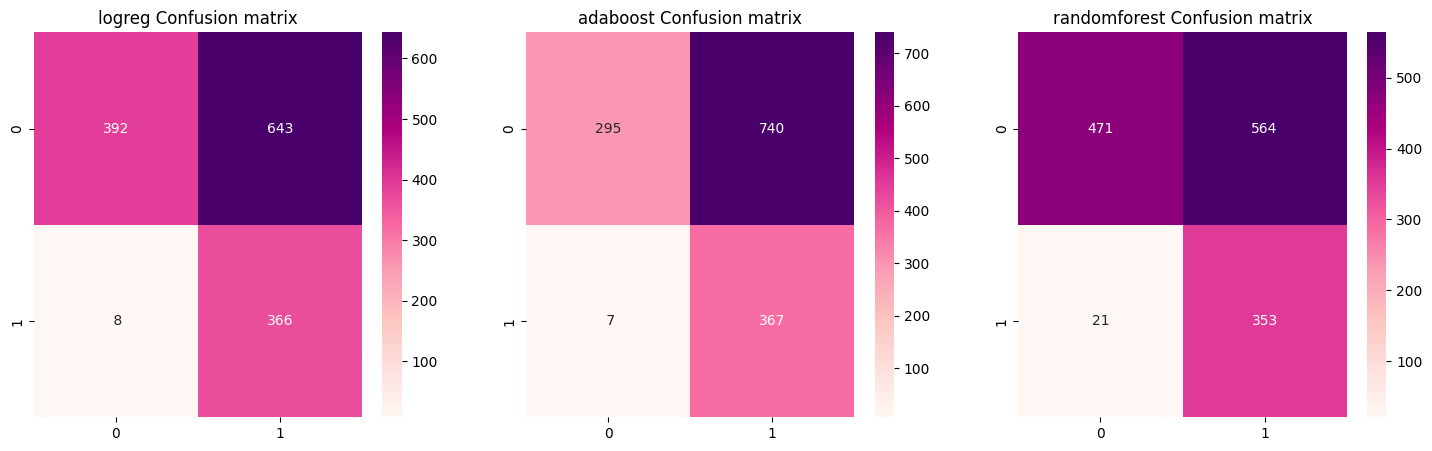

In [145]:
#Plot optimal confusion matrices for optimal thresholds
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(18,5))

#loop over the chosen models and plot confusion matrix
for i,model in enumerate(chosen_models):
    plt.subplot(1,3,i+1)
    y_pred_proba  = chosen_models[model].predict_proba(X_eval)[:,1]
    binarypred = (y_pred_proba > threshold_df['Threshold'][i]).astype(int)
    threshold_matrix = confusion_matrix(y_eval_encoded,binarypred)
    axs = sns.heatmap(threshold_matrix, annot=True, cmap='RdPu', fmt='2.0f')
    plt.title(f'{model} Confusion matrix')

plt.show()

#### **Model Persistence**

In [147]:
#dumping models using joblib

joblib.dump(adaboost,'Models/adaboost.joblib')
joblib.dump(logreg,'Models/logisticregression.joblib')
joblib.dump(randomforest,'Models/randomforest.joblib')

['Models/randomforest.joblib']